In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pearson_util 
import descartes
import pygeoj
import matplotlib.pyplot as plt


In [2]:
gdf_dw = gpd.read_file('C:/Users/seanp/python/NUTS_RG_60M_2016_3035_LEVL_3.geojson')
gdf_dw.iloc[1318:1522]

,id,COAST_TYPE,MOUNT_TYPE,NAME_LATN,CNTR_CODE,FID,NUTS_ID,NUTS_NAME,LEVL_CODE,URBN_TYPE,geometry
1318,RO414,3,4,Olt,RO,RO414,RO414,Olt,3,3,"POLYGON ((5500624.645 2481498.725, 5496185.887..."
1319,RO415,3,2,Vâlcea,RO,RO415,RO415,Vâlcea,3,3,"POLYGON ((5457799.893 2527102.235, 5447340.912..."
1320,UKH25,3,4,Central Bedfordshire,UK,UKH25,UKH25,Central Bedfordshire,3,1,"POLYGON ((3627278.940 3267434.368, 3608276.298..."
1321,UKH31,1,4,Southend-on-Sea,UK,UKH31,UKH31,Southend-on-Sea,3,1,"POLYGON ((3681173.766 3201641.834, 3684013.709..."
1322,UKH32,1,4,Thurrock,UK,UKH32,UKH32,Thurrock,3,1,"POLYGON ((3664855.621 3200561.199, 3654719.164..."
...,...,...,...,...,...,...,...,...,...,...,...
1517,UKH16,1,4,North and West Norfolk,UK,UKH16,UKH16,North and West Norfolk,3,3,"POLYGON ((3760200.001 3324800.736, 3715302.262..."
1518,UKH17,2,4,Breckland and South Norfolk,UK,UKH17,UKH17,Breckland and South Norfolk,3,3,"POLYGON ((3754275.042 3301188.055, 3706277.604..."
1519,UKH21,2,4,Luton,UK,UKH21,UKH21,Luton,3,1,"POLYGON ((3608276.298 3251322.689, 3605470.224..."
1520,UKH23,2,4,Hertfordshire,UK,UKH23,UKH23,Hertfordshire,3,1,"POLYGON ((3641428.795 3257056.214, 3631036.624..."


In [3]:
gdf = gpd.read_file('https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_60M_2016_3035_LEVL_3.geojson')

# Creating dataframes of average national annual road freight transport by regions (NUTS 3) and by group of goods (1 000 t)

In [4]:
#National annual road freight transport by regions of unloading (NUTS 3) and by group of goods (1 000 t), from 2008 onwards (road_go_na_ru3g)
df_unloading = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_ru3g.tsv.gz',['subsector', 'unit', 'region'])

In [5]:
df_unloading_total = df_unloading.loc['TOTAL']

In [6]:
df_unloading_total = df_unloading_total.droplevel(0)

In [7]:
#sets index of the df to the same index the gdf has and thereby delets all rowes which have a different id (old NUTS 3 data)
df_unloading_nuts3 = df_unloading_total.reindex(gdf.set_index('id').index)

In [8]:
#filters the countries that have no data
no_data_nuts3 = df_unloading_nuts3[df_unloading_nuts3.isna().all(axis=1)].sort_index().index

In [9]:
#National annual road freight transport by regions of loading (NUTS 3) and by group of goods (1 000 t), from 2008 onwards (road_go_na_rl3g
df_loading = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_rl3g.tsv.gz',['subsector', 'unit', 'region'])

In [10]:
df_loading_total = df_loading.loc['TOTAL']

In [11]:
df_loading_total = df_loading_total.droplevel(0)

In [12]:
#sets index of the df to the same index the gdf has and thereby delets all rowes which have a different id (old NUTS 3 data)
df_loading_nuts3 = df_loading_total.reindex(gdf.set_index('id').index)

In [13]:
no_data_nuts3 = df_unloading_nuts3[df_unloading_nuts3.isna().all(axis=1)].sort_index().index

In [14]:
df_loading_nuts3.head()

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
CZ052,31164.0,23410.0,22302.0,22533.0,20556.0,16265.0,15133.0,14044.0,17536.0,12320.0,16522.0,17859.0
CZ053,27127.0,20301.0,20399.0,21064.0,19896.0,16948.0,15222.0,12602.0,14166.0,14423.0,16343.0,20090.0
CZ063,22196.0,26155.0,18682.0,20785.0,19078.0,15516.0,12487.0,9854.0,13296.0,14551.0,18543.0,20061.0
CZ064,49041.0,47453.0,43448.0,38848.0,40457.0,35683.0,29350.0,25806.0,26051.0,27880.0,31335.0,40006.0
CZ071,37656.0,34631.0,29204.0,26120.0,25596.0,26760.0,18776.0,23872.0,21159.0,19474.0,25554.0,25133.0


In [15]:
#Concatinates df --> takes 2 df and joins them together
df_average_transport_total = pd.concat((df_unloading_nuts3, df_loading_nuts3))

In [16]:
#takes lines with same index and calculates mean of them
df_average_transport_total = df_average_transport_total.groupby(df_average_transport_total.index).mean()

In [17]:
#sets the index 'country' and takes it from the cntr_code column of the gdf
df_average_transport_total = df_average_transport_total.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)

In [18]:
df_average_transport_total.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,3002.0,3325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,5311.5,3286.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,4799.5,2361.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,4986.5,3731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,4350.5,4223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Compacted

In [19]:
#unloading
df_unloading_GT01 = df_unloading.loc['GT01']
df_unloading_GT01 = df_unloading_GT01.droplevel(0)
df_unloading_GT01_nuts3 = df_unloading_GT01.reindex(gdf.set_index('id').index)
#loading
df_loading_GT01 = df_loading.loc['GT01']
df_loading_GT01 = df_loading_GT01.droplevel(0)
df_loading_GT01_nuts3 = df_loading_GT01.reindex(gdf.set_index('id').index)
#combining
df_average_transport_GT01 = pd.concat((df_unloading_GT01_nuts3, df_loading_GT01_nuts3))
df_average_transport_GT01 = df_average_transport_GT01.groupby(df_average_transport_GT01.index).mean()
df_average_transport_GT01 = df_average_transport_GT01.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
#share
df_transport_share_GT01 = df_average_transport_GT01.div(df_average_transport_total)
df_transport_share_GT01.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,0.147568,0.065865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,0.040102,0.067701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,0.030420,0.016727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,0.150607,0.081211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,0.092058,0.085958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#unloading
df_unloading_GT02 = df_unloading.loc['GT02']
df_unloading_GT02 = df_unloading_GT02.droplevel(0)
df_unloading_GT02_nuts3 = df_unloading_GT02.reindex(gdf.set_index('id').index)
#loading
df_loading_GT02 = df_loading.loc['GT02']
df_loading_GT02 = df_loading_GT02.droplevel(0)
df_loading_GT02_nuts3 = df_loading_GT02.reindex(gdf.set_index('id').index)
#combining
df_average_transport_GT02 = pd.concat((df_unloading_GT02_nuts3, df_loading_GT02_nuts3))
df_average_transport_GT02 = df_average_transport_GT02.groupby(df_average_transport_GT02.index).mean()
df_average_transport_GT02 = df_average_transport_GT02.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
#share
df_transport_share_GT02 = df_average_transport_GT02.div(df_average_transport_total)
df_transport_share_GT02.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,0.013824,0.006316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,NaN,0.010650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,0.002607,0.006433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,0.030341,0.002842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Multiply shares of transported good types with transportdistance and amount of these good types = amount of specific good types transported for specific distance in each NUTS 3 region

In [21]:
df_transportdistance = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_dctg.tsv.gz',['Type_of_carriage', 'Distance','Subsector', 'Unit', 'Country'])

In [22]:
df_transportdistance

2019       2018   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          1904.0     2007.0   
                                           BE          4249.0     3975.0   
                                           BG          1581.0     1850.0   
                                           CH          1355.0     1009.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        444460.0   475457.0   
                                           SI         54439.0    50164.0   
                                           SK        142892.0   128855.0   
                                           UK       1453669.0  1408269.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2017       2016   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          2275.0     2138.0   
                                           BE          3238.0     3754.0   
                                           BG          1921.0     1767.0   
                                           CH           949.0     1027.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        449691.0   426715.0   
                                           SI         54027.0    46096.0   
                                           SK        128789.0   105812.0   
                                           UK       1402948.0  1435273.0   
                           UNK       THS_T UK             NaN        1.0   

                                                        2015       2014   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          2131.0     1759.0   
                                           BE          4607.0     2015.0   
                                           BG          2249.0     2017.0   
                                           CH          1447.0     1117.0   
                                           CY             1.0        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        416940.0   375707.0   
                                           SI         43530.0    50698.0   
                                           SK        100698.0   101173.0   
                                           UK       1450651.0  1329869.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2013       2012   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          1689.0     2037.0   
                                           BE          1766.0     2039.0   
                                           BG          1858.0     1479.0   
                                           CH          1412.0      825.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        276659.0   290008.0   
                                           SI         42608.0    40847.0   
                                           SK         92402.0    94709.0   
                                           UK       1328683.0  1445128.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2011       2010   \
Type_of_carriage Distanc

In [23]:
#distance is not selected yet. 'TOT' is all distance classes
df_transportdistance = df_transportdistance.loc[('TOT', 'TOTAL', 'GT01')]
df_transportdistance = df_transportdistance.droplevel(0)
df_transportdistance

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
Country,,,,,,,,,,,,
AT,20123.0,20403.0,21207.0,20101.0,18420.0,17585.0,16393.0,17401.0,16792.0,16982.0,16158.0,16370.0
BE,15288.0,14830.0,17183.0,15166.0,22226.0,15810.0,13565.0,15258.0,12517.0,12269.0,12766.0,12279.0
BG,18391.0,16911.0,20428.0,13730.0,15953.0,15894.0,17106.0,13491.0,12620.0,11862.0,9458.0,9437.0
CH,20354.0,18403.0,18184.0,21628.0,20123.0,17602.0,19401.0,16091.0,14448.0,17053.0,14878.0,17348.0
CY,1997.0,2448.0,2290.0,1706.0,1570.0,1103.0,1530.0,2401.0,1451.0,1724.0,2016.0,1689.0
CZ,48847.0,43147.0,44013.0,43167.0,43299.0,42064.0,42518.0,38820.0,37777.0,36917.0,37724.0,42282.0
DE,160035.0,159232.0,160675.0,154649.0,163074.0,166528.0,142776.0,153366.0,153241.0,145574.0,135254.0,139583.0
DK,29243.0,28607.0,27276.0,25282.0,26735.0,24098.0,22827.0,27611.0,29493.0,23662.0,19153.0,22636.0
EE,4787.0,4034.0,4478.0,3625.0,3321.0,4194.0,3868.0,4075.0,3926.0,3906.0,3154.0,2992.0


In [24]:
#mulitply transport_share_goodstype with transportamount and can be selected by distance
df_transportdistance_share_GT01 = df_transport_share_GT01.multiply(df_transportdistance, level = 'country')
df_transportdistance_share_GT01

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
AL011,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,UK,13544.112592,7386.260752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,3680.611127,7592.215883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,2791.993333,1875.777472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Adding column to gdf

In [25]:
df_transportdistance_share_GT01.columns = ['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008']

In [26]:
#droping country index
df_tds_GT01 = df_transportdistance_share_GT01.droplevel(1)

In [27]:
#set the id column as an index so pandas will align the id of the gdf with the id of the df
gdf_dw = gdf_dw.set_index('id')

In [28]:
#add the data from the df to the gdf
gdf1 = gdf_dw.join(df_tds_GT01)
gdf_select = gdf1.drop(['ES708', 'ES704', 'ES705', 'ES709', 'ES706', 'ES703', 'ES707', 'CY000'])

# Mapping new gdf

<AxesSubplot:>

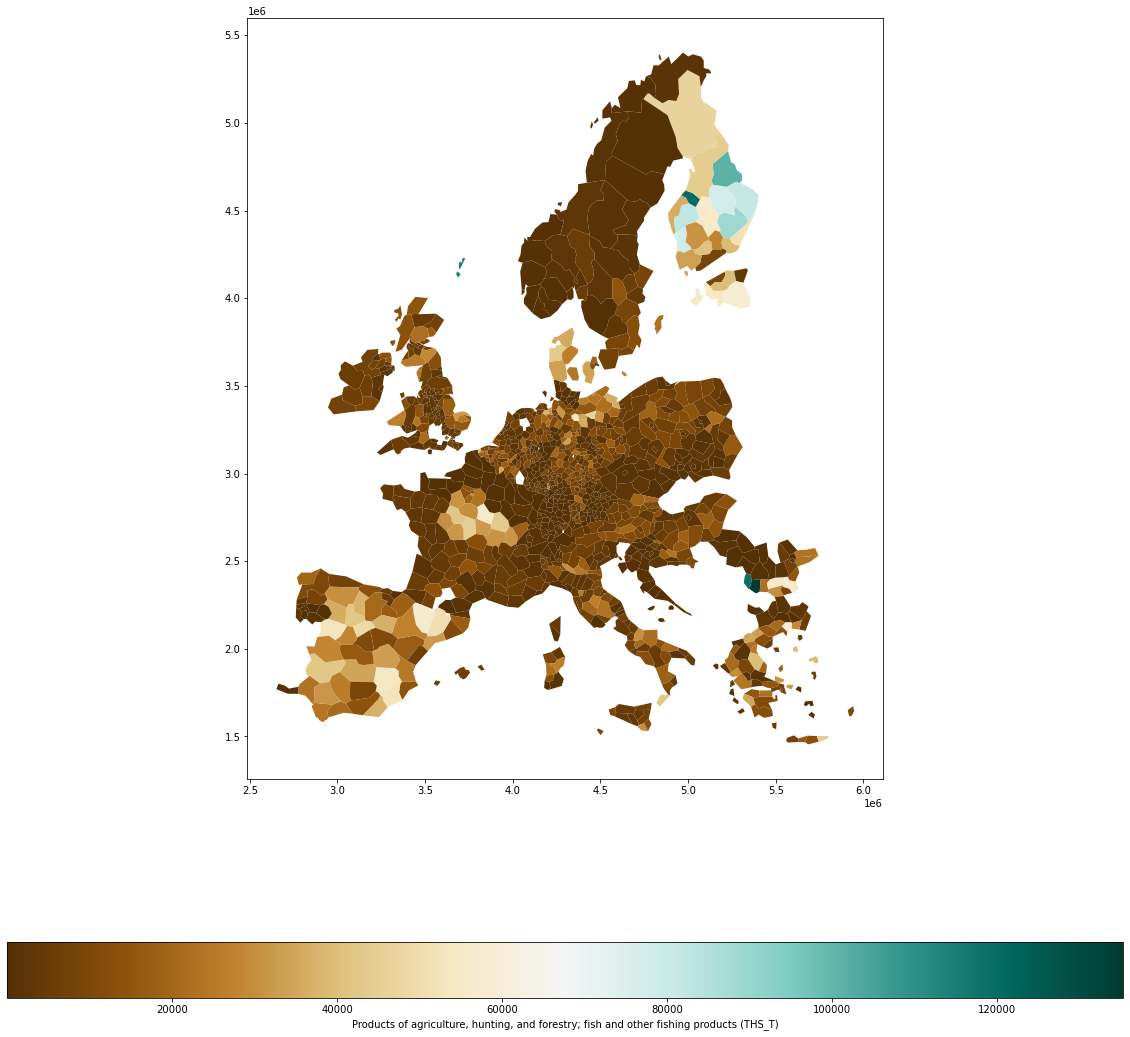

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
gdf_select.plot(column = '2019', 
          ax = ax, 
          legend=True,
         legend_kwds = {'label': 'Products of agriculture, hunting, and forestry; fish and other fishing products (THS_T)',
                        'orientation': "horizontal"},
         cmap = 'BrBG',
         
         )
        

# Calculating Energy consumption of Transport fleet

Calculating the share that each region has compared to its national transport 

In [31]:
#load national transport amount with NUTS 3 regions, take average of un- loading, sum up total transport
df_average_transport_total_EC = df_unloading_nuts3.add(df_loading_nuts3).div(2)
df_average_transport_total_EC = df_average_transport_total_EC.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
sum_total_national_transport = df_average_transport_total_EC.groupby('country').sum()

In [32]:
df_average_transport_total_EC.iloc[1320:1522]

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKH25,UK,6905.5,6347.0,6146.0,7611.0,8662.5,6463.0,5062.0,9614.0,NaN,NaN,NaN,NaN
UKH31,UK,1801.0,721.0,435.5,1118.5,530.5,1480.5,1016.5,732.0,713.5,1004.0,826.5,1082.5
UKH32,UK,25947.5,25773.0,21504.5,27454.0,21428.0,15625.5,19223.0,19511.5,28540.0,24604.5,18238.0,26465.0
UKH34,UK,7874.5,9607.5,7725.0,5770.5,6262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH35,UK,6341.0,5087.0,6735.0,7111.5,6451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,8230.0,7594.0,6323.0,8149.5,5257.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,7337.0,9184.0,9038.5,12646.0,9626.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,2770.0,2196.0,2311.0,2416.5,1317.0,1453.5,1216.5,1337.0,1936.5,2065.5,3413.5,1993.5


In [33]:
#test if the tables are summed up correctly
test = df_average_transport_total_EC.xs('UK', level='country')
test.sum()

2019     1453669.5
2018     1408268.5
2017     1260223.5
2016     1288953.0
2015     1307366.5
2014      913905.5
2013      924387.0
2012      995509.0
2011      838530.0
2010      873381.0
2009      833711.0
2008      987731.5
dtype: float64

In [34]:
sum_total_national_transport

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,377402.0,367527.5,360241.0,350227.0,325651.0,323233.5,300228.5,305378.5,313114.5,299971.5,303059.0,332079.0
BE,229611.0,233204.5,238837.5,233722.0,234554.0,250709.5,248857.0,239135.0,233721.0,237050.0,233592.0,249626.5
BG,97573.5,121892.5,119698.0,114631.0,134360.5,134264.0,138756.0,122173.0,121627.5,118090.5,136857.0,168592.5
CH,289299.0,283433.5,281639.0,274094.0,278494.0,290786.0,283820.0,287500.0,287909.0,269302.0,270984.5,275411.0
CY,29333.0,29280.0,25569.0,19661.0,14384.0,14569.0,16099.0,22941.0,26018.0,32216.0,28493.0,41601.0
CZ,475527.0,446685.5,418791.0,383311.5,375350.0,324080.5,289114.0,281340.0,288522.5,301390.0,324977.5,382382.5
DE,3093879.0,3078252.5,3022419.0,2969829.5,2894485.0,2848168.0,2737923.0,2686772.0,2495777.0,2274422.0,2299569.5,2547768.0
DK,162569.0,162033.0,174017.5,178672.5,175130.5,171258.5,165531.5,167193.0,169413.0,156751.0,137872.0,179252.0


In [35]:
#calculates the share that each region has of the total goods transported in the country and tests if it has been calculated correctly (assert if sum of all shares = 1 rounded to two decimals)
share_total_national_transport_region = df_average_transport_total_EC.divide(sum_total_national_transport, level = 'country')
test = share_total_national_transport_region.sum(level='country', min_count=1)
test.columns = test.columns.astype(int) #  test.columns.str.strip()
assert (test[2019].dropna().round(2) == 1.00).all()

In [51]:
share_total_national_transport_region

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
CZ052,CZ,0.064279,0.054079,0.053354,0.060268,0.056646,0.050714,0.053494,0.050371,0.061567,0.042337,0.052482,0.047574
CZ053,CZ,0.057333,0.040995,0.047622,0.053226,0.051681,0.051122,0.051582,0.044601,0.049842,0.045347,0.049988,0.051003
CZ063,CZ,0.046840,0.060562,0.047191,0.055554,0.051753,0.049812,0.045072,0.037080,0.046558,0.050990,0.057999,0.053330
CZ064,CZ,0.104410,0.106527,0.104341,0.100842,0.107433,0.110355,0.101308,0.092257,0.090275,0.093213,0.096997,0.104401
CZ071,CZ,0.076863,0.076764,0.066987,0.066376,0.066390,0.079033,0.059738,0.082032,0.069074,0.062260,0.074907,0.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,0.005662,0.005392,0.005017,0.006323,0.004021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,0.005047,0.006521,0.007172,0.009811,0.007363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,0.001906,0.001559,0.001834,0.001875,0.001007,0.001590,0.001316,0.001343,0.002309,0.002365,0.004094,0.002018


1. Try to calculate enrgy consumption of transport fleet
international transport (country, (THS_t)) + national transport (country, (THS_t)) = total transport (THS_t)
Mio_Tkm of total transport (country) / total transport (THS_t) = km driven total transport (Country, (THS_km))
km driven total transport (Country, (THS_km)) * share of transport of each region (region) = km driven each region (THS_km)
km driven each region (THS_km) * energy consumption per km = Energy consumtion of transport (MWh)

In [56]:
#loading international transport dataset
df_unloading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_ugtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
df_loading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_lgtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
#filtering dataset to proper data
df_unloading_int_EC = df_unloading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_unloading_int_EC = df_unloading_int_EC.droplevel(0)
df_loading_int_EC = df_loading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_loading_int_EC = df_loading_int_EC.droplevel(0)
#average of loaning and unloading
df_average_transport_total_int_EC = pd.concat((df_loading_int_EC, df_unloading_int_EC))
df_average_transport_total_int_EC = df_average_transport_total_int_EC.groupby(df_average_transport_total_int_EC.index).mean()
df_average_transport_total_int_EC

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AT,9917.5,10505.0,10841.5,10602.5,10228.0,10478.5,10034.0,11545.5,13000.5,12434.5,13583.0,15152.5
BE,21691.0,21912.0,25084.5,23268.0,24790.0,20476.0,21856.0,22092.5,23466.5,24614.5,26847.0,28289.5
BG,3936.0,4904.0,5675.0,6139.0,6145.0,4848.0,5483.5,4492.5,4527.0,3401.5,3223.5,3041.5
CH,5400.5,4046.5,4150.5,4512.5,4674.5,5082.0,4785.5,5584.5,6533.5,5392.5,5505.0,6493.5
CY,14.5,14.5,13.0,10.5,9.0,8.5,11.0,11.5,16.0,15.5,15.0,9.0
CZ,12681.5,14934.0,17784.5,20432.0,24781.0,23080.0,22553.0,20317.0,21474.0,19909.0,16764.5,18799.5
DE,49090.5,52702.5,53574.0,54965.0,53531.5,54960.0,55585.0,56703.0,60667.5,60049.0,61187.0,73419.5
DK,2054.0,2267.0,1932.0,2210.0,1987.5,2364.0,2887.5,3239.5,3202.5,3446.5,4897.5,6452.0
EE,1310.5,1384.0,1577.0,1753.0,1456.0,1620.0,1582.5,1486.0,1689.0,1429.5,1272.0,1971.5


In [61]:
#loading and filtering MIO_Tkm dataset 
df_total_transport_mio_Tkm_country_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_tott.tsv.gz',[ 'Type_of_carriage', 'Type_of operation', 'unit', 'country'])
df_total_transport_mio_Tkm_country_EC = df_total_transport_mio_Tkm_country_EC.loc[('TOT', 'TOTAL', 'MIO_TKM')]
df_total_transport_mio_Tkm_country_EC = df_total_transport_mio_Tkm_country_EC.drop(['EU15', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'LI'])
df_total_transport_mio_Tkm_country_EC

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
country,,,,,,,,,,,,,,,,,,,,,
AT,26444.0,25763.0,25978.0,26138.0,25458.0,25260.0,24213.0,26089.0,28542.0,28659.0,...,34313.0,37402.0,39187.0,37044.0,39186.0,39557.0,38498.0,37532.0,35122.0,33981.0
BE,34829.0,32685.0,34220.0,35192.0,36078.0,31808.0,32796.0,32105.0,33107.0,35002.0,...,38356.0,42085.0,43017.0,43847.0,47878.0,50542.0,52889.0,53182.0,51047.0,37284.0
BG,20551.0,NaN,35150.0,NaN,32297.0,NaN,27097.0,NaN,21214.0,19433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,NaN,11947.0,NaN,12441.0,NaN,12817.0,12966.0,13567.0,NaN,...,13911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,858.0,892.0,826.0,703.0,563.0,538.0,634.0,896.0,941.0,1087.0,...,1308.0,1202.0,1165.0,1393.0,1119.0,1401.0,NaN,NaN,NaN,NaN
CZ,NaN,NaN,NaN,50315.0,58715.0,54092.0,54893.0,51228.0,54830.0,51832.0,...,50877.0,48141.0,NaN,NaN,46011.0,NaN,NaN,39067.0,37310.0,NaN
DE,311875.0,316772.0,313149.0,315774.0,314816.0,310142.0,305744.0,307009.0,323833.0,313104.0,...,341532.0,343447.0,330016.0,310103.0,303752.0,290745.0,285214.0,288964.0,280708.0,278427.0
DK,14991.0,14998.0,15502.0,16094.0,15500.0,16184.0,NaN,16679.0,16120.0,15018.0,...,NaN,NaN,21254.0,NaN,NaN,NaN,22516.0,NaN,24021.0,23236.0
EE,4794.0,5775.0,NaN,6716.0,NaN,6310.0,5986.0,5791.0,5912.0,NaN,...,7354.0,6417.0,NaN,NaN,NaN,3974.0,NaN,NaN,NaN,NaN


In [54]:
#sum of int + national transport on country level, devide mio Tkm per country by the THS_t transport per country and multipy that with the share of transport per region
total_national_international_transport_country_test = pd.concat((df_average_transport_total_int_EC, sum_total_national_transport))
total_national_international_transport_country_test = total_national_international_transport_country_test.groupby('country').sum()
km_driven_country = df_total_transport_mio_Tkm_country_EC.divide(total_national_international_transport_country_test)
km_driven_region_test = share_total_national_transport_region.multiply(km_driven_country)
km_driven_region_test.sum(level = 'country') 

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
CZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126818,...,0.161320,0.176873,0.169822,0.176127,0.155813,0.146739,0.124621,0.000000,0.000000,0.000000
DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130297,...,0.134122,0.126673,0.111905,0.109448,0.106830,0.106789,0.104395,0.101804,0.101174,0.099229
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098819,...,0.091736,0.087521,0.082319,0.078040,0.075694,0.075795,0.072439,0.070006,0.068150,0.068274
BE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138013,...,0.133767,0.128727,0.122901,0.121147,0.117292,0.139113,0.136939,0.129660,0.128118,0.138594
BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.159953,0.168159,0.000000,0.187861,0.000000,0.229863,0.000000,0.280363,0.000000,0.202454
CH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049346,...,0.000000,0.046077,0.044240,0.044410,0.000000,0.043935,0.000000,0.041803,0.000000,0.000000
CY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031435,...,0.033725,0.036145,0.039037,0.039354,0.036906,0.039116,0.035737,0.032288,0.030449,0.029236
EL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490134,...,0.607063,0.000000,0.000000,0.462947,0.564312,0.047247,0.049967,0.073826,0.082092,0.080670


In [57]:
total_national_international_transport_country_test

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,387319.5,378032.5,371082.5,360829.5,335879.0,333712.0,310262.5,316924.0,326115.0,312406.0,316642.0,347231.5
BE,251302.0,255116.5,263922.0,256990.0,259344.0,271185.5,270713.0,261227.5,257187.5,261664.5,260439.0,277916.0
BG,101509.5,126796.5,125373.0,120770.0,140505.5,139112.0,144239.5,126665.5,126154.5,121492.0,140080.5,171634.0
CH,294699.5,287480.0,285789.5,278606.5,283168.5,295868.0,288605.5,293084.5,294442.5,274694.5,276489.5,281904.5
CY,29347.5,29294.5,25582.0,19671.5,14393.0,14577.5,16110.0,22952.5,26034.0,32231.5,28508.0,41610.0
CZ,488208.5,461619.5,436575.5,403743.5,400131.0,347160.5,311667.0,301657.0,309996.5,321299.0,341742.0,401182.0
DE,3142969.5,3130955.0,3075993.0,3024794.5,2948016.5,2903128.0,2793508.0,2743475.0,2556444.5,2334471.0,2360756.5,2621187.5
DK,164623.0,164300.0,175949.5,180882.5,177118.0,173622.5,168419.0,170432.5,172615.5,160197.5,142769.5,185704.0


In [55]:
km_driven_region_test

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006033,...,0.006830,0.010890,0.008554,0.009422,0.007902,0.008312,0.007511,NaN,NaN,NaN
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006468,...,0.007315,0.008816,0.007574,0.009085,0.007965,0.007584,0.006633,NaN,NaN,NaN
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006763,...,0.008226,0.008235,0.006297,0.007938,0.007761,0.007594,0.006923,NaN,NaN,NaN
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013240,...,0.015037,0.015967,0.015667,0.017843,0.017195,0.015765,0.012567,NaN,NaN,NaN
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008010,...,0.010044,0.012217,0.013931,0.010521,0.012314,0.009742,0.008272,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000757,NaN,0.000607,0.000623
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001174,NaN,0.000734,0.000556
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000325,...,NaN,NaN,0.000202,0.000197,0.000233,NaN,0.000224,NaN,0.000175,0.000210


2. Try to calculate energy consumption of vehicle fleet
Million vehivle-kilometers * energy consumption per kilometer * share of each region = energyconsumtion of fleet

In [114]:
df_total_transport_mio_Vkm_country_2 = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_tott.tsv.gz',[ 'Type_of_carriage', 'Type_of operation', 'unit', 'country'])
df_total_transport_mio_Vkm_country_2 = df_total_transport_mio_Vkm_country_2.loc[('TOT', 'TOTAL', 'MIO_VKM')]
df_total_transport_mio_Vkm_country_2 = df_total_transport_mio_Vkm_country_2.drop(['EU15', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'LI'])
df_total_transport_mio_Vkm_country_2.columns = df_total_transport_mio_Vkm_country_2.columns.astype(int)
df_total_transport_mio_Vkm_country_2

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
country,,,,,,,,,,,,,,,,,,,,,
AT,2713.0,2678.0,2671.0,2643.0,2573.0,2500.0,2411.0,2512.0,2690.0,2709.0,...,3154.0,3327.0,3391.0,3137.0,3268.0,3328.0,3235.0,3218.0,3087.0,3057.0
BE,2807.0,2554.0,2774.0,2728.0,2850.0,2373.0,2378.0,2326.0,2392.0,2478.0,...,2678.0,3173.0,3419.0,3355.0,3755.0,3869.0,4208.0,4316.0,4034.0,3103.0
BG,1634.0,NaN,2737.0,NaN,2653.0,NaN,2380.0,NaN,2060.0,1944.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,NaN,1865.0,NaN,1875.0,NaN,1912.0,1918.0,1968.0,NaN,...,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,146.0,142.0,134.0,119.0,96.0,89.0,102.0,137.0,151.0,150.0,...,210.0,161.0,155.0,196.0,143.0,206.0,NaN,NaN,NaN,NaN
CZ,NaN,NaN,NaN,5114.0,5527.0,5138.0,5056.0,4788.0,5028.0,4876.0,...,5364.0,5279.0,NaN,NaN,5495.0,NaN,NaN,5267.0,6218.0,NaN
DE,30110.0,30416.0,30123.0,30237.0,30083.0,29582.0,29009.0,29106.0,30347.0,29295.0,...,31787.0,31460.0,30243.0,28853.0,28792.0,27911.0,28025.0,29030.0,28734.0,28796.0
DK,1475.0,1465.0,1494.0,1556.0,1575.0,1636.0,NaN,1691.0,1697.0,1692.0,...,NaN,NaN,2210.0,NaN,NaN,NaN,2324.0,NaN,2387.0,2347.0
EE,357.0,417.0,NaN,495.0,NaN,456.0,464.0,438.0,451.0,NaN,...,603.0,537.0,NaN,NaN,NaN,527.0,NaN,NaN,NaN,NaN


In [115]:
toe = pd.read_excel('C:/Users/seanp/python/anaconda3/envs/python_backup/my_python_work/Data/Summary_Vehicles_Fuels.xlsx', sheet_name = 'fuel_consumption_model_kopie')
toe = toe.set_index('country')
toe = toe.drop(columns=['Type'])
toe.columns = toe.columns.astype(int)
toe

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
country,,,,,,,,,,,,,,,,,,,,,
UK,41.42,41.86,41.83,41.56,42.20,43.01,42.03,44.34,44.12,46.24,...,35.680560,34.396060,33.157802,31.964121,30.813412,29.704130,28.634781,27.603929,26.610187,25.652221
SK,41.41,37.35,45.39,31.05,32.32,42.31,46.30,46.35,45.29,41.70,...,34.252054,33.018980,31.830296,30.684406,29.579767,28.514895,27.488359,26.498778,25.544822,24.625209
SL,24.88,33.22,33.14,37.06,41.35,46.52,50.52,66.04,92.44,66.86,...,59.965170,57.806424,55.725392,53.719278,51.785384,49.921110,48.123950,46.391488,44.721395,43.111424
SE,52.19,52.26,50.34,52.50,54.70,55.98,56.74,54.75,55.74,54.67,...,38.569674,37.181166,35.842644,34.552309,33.308426,32.109322,30.953387,29.839065,28.764858,27.729324
RO,40.98,54.61,57.83,58.29,48.39,34.84,42.23,36.10,37.80,41.69,...,38.048029,36.678300,35.357881,34.084997,32.857937,31.675051,30.534750,29.435499,28.375821,27.354291
PT,41.53,41.83,40.95,52.53,49.43,44.98,46.18,43.83,45.29,45.98,...,44.355928,42.759114,41.219786,39.735874,38.305383,36.926389,35.597039,34.315545,33.080186,31.889299
PL,14.76,16.79,13.04,19.49,23.74,30.15,35.14,39.81,39.98,39.37,...,20.199723,19.472533,18.771522,18.095747,17.444300,16.816305,16.210918,15.627325,15.064742,14.522411
AT,66.75,76.43,86.34,94.03,91.28,94.16,77.00,72.65,61.68,67.23,...,59.106461,56.978628,54.927398,52.950011,51.043811,49.206234,47.434809,45.727156,44.080978,42.494063
BE,52.23,50.34,50.78,54.08,53.92,54.83,56.55,58.89,61.06,59.46,...,45.792460,44.143931,42.554750,41.022779,39.545959,38.122304,36.749901,35.426905,34.151536,32.922081


In [121]:
toe_mio_Vkm_country = toe.multiply(df_total_transport_mio_Vkm_country_2)
toe_mio_Vkm_country.columns = toe_mio_Vkm_country.columns.astype(int)
toe_mio_Vkm_country

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
country,,,,,,,,,,,,,,,,,,,,,
AT,NaN,206057.25,245951.74,279309.90,312931.84,298303.04,295379.92,261107.00,241706.55,194538.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE,NaN,210695.82,217267.44,213682.24,209235.52,202469.60,183954.65,193344.45,186857.97,163518.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,NaN,NaN,NaN,NaN,10112.54,7606.17,9472.68,7531.45,8021.02,10090.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ,NaN,250461.04,204570.28,NaN,NaN,238428.05,NaN,NaN,267275.77,279518.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE,NaN,1426355.76,1321155.30,1259163.25,1207708.97,1133253.12,1084007.21,1151955.87,1122178.20,1086161.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DK,NaN,109229.12,NaN,108786.44,NaN,NaN,NaN,114942.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EE,NaN,NaN,NaN,NaN,25485.72,NaN,NaN,NaN,28708.02,28353.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
share_total_national_transport_region.columns = share_total_national_transport_region.columns.astype(int)
toe_mio_Vkm_region = share_total_national_transport_region.multiply(toe_mio_Vkm_country)
MWh_region = toe_mio_Vkm_region.multiply(11.63)
MWh_region.columns = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']
MWh_region

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154653.609145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165798.972726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173365.237857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339385.247542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205313.579840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21967.173125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
gdf1 = gdf_dw.join(MWh_region)
gdf_MWh_region = gdf1.drop(['ES708', 'ES704', 'ES705', 'ES709', 'ES706', 'ES703', 'ES707', 'CY000'])
gdf_MWh_region['2019']

id     country
CZ052  CZ                   NaN
CZ053  CZ                   NaN
CZ063  CZ                   NaN
CZ064  CZ                   NaN
CZ071  CZ                   NaN
                      ...      
UKH16  UK          50129.373647
UKH17  UK          44690.062509
UKH21  UK          16872.219320
UKH23  UK         131496.717251
UKH24  UK          37146.292246
Name: 2019, Length: 1514, dtype: float64

<AxesSubplot:>

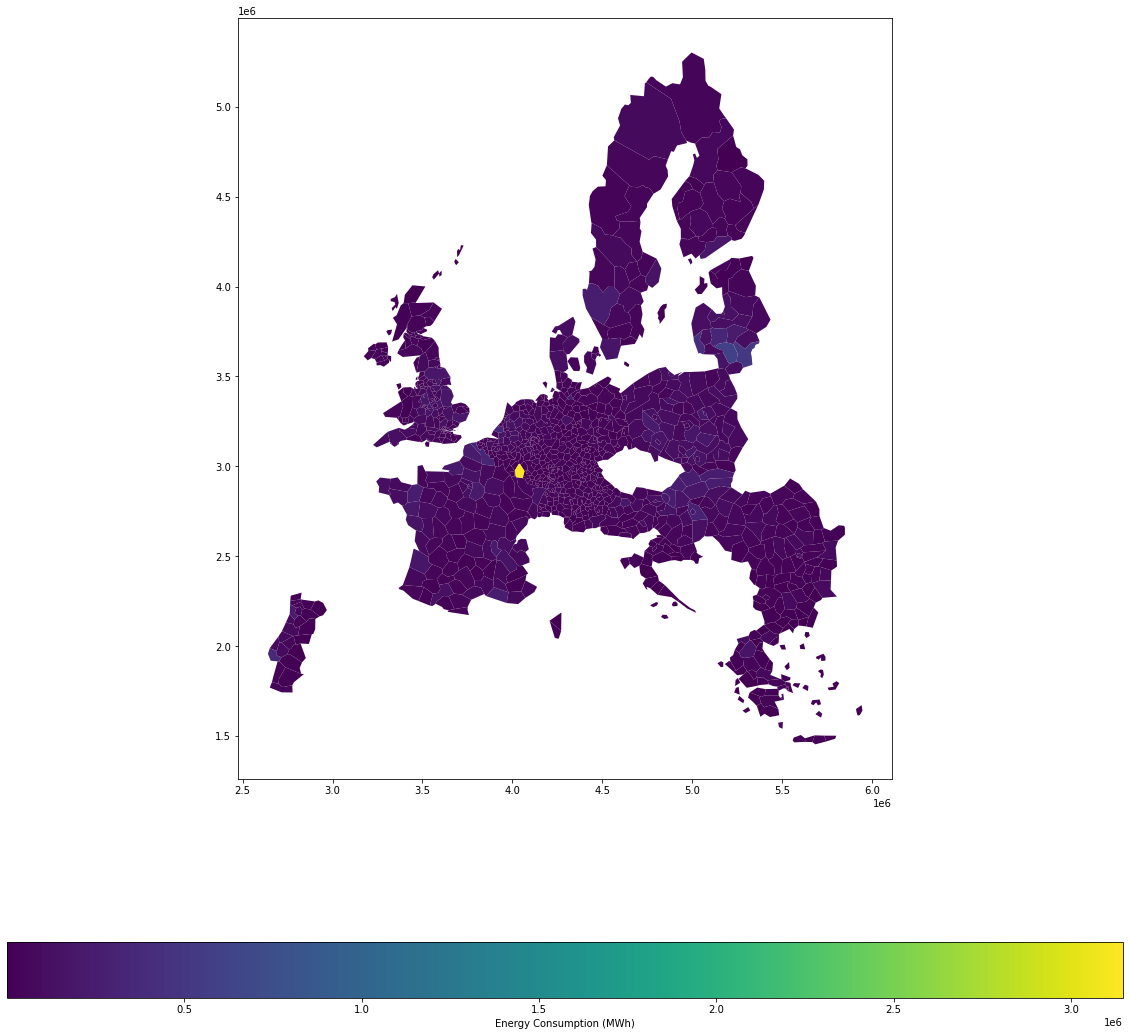

In [152]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
gdf_MWh_region.plot(column = '2019', 
          ax = ax, 
          legend=True,
         legend_kwds = {'label': 'Energy Consumption (MWh)',
                        'orientation': "horizontal"},
         cmap = 'viridis',
         
         )

# Test area

In [36]:
#loading international transport dataset
df_unloading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_ugtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
df_loading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_lgtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
#filtering dataset to proper data
df_unloading_int_EC = df_unloading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_unloading_int_EC = df_unloading_int_EC.droplevel(0)
df_loading_int_EC = df_loading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_loading_int_EC = df_loading_int_EC.droplevel(0)
#average of loaning and unloading
df_average_transport_total_int_EC = pd.concat((df_loading_int_EC, df_unloading_int_EC))
df_average_transport_total_int_EC = df_average_transport_total_int_EC.groupby(df_average_transport_total_int_EC.index).mean()
#multiplay international transport with share of total national tranport for each region
international_transport_region = share_total_national_transport_region.multiply(df_average_transport_total_int_EC)
#sum of national and international transport
df_average_transport_total = df_average_transport_total.droplevel(1)
international_transport_region = international_transport_region.droplevel(1)
total_national_international_transport_region = pd.concat((international_transport_region, df_average_transport_total))
total_national_international_transport_region = total_national_international_transport_region.groupby('id').sum()
total_national_international_transport_region

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
AL011,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL012,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL013,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL014,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL015,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,3017.073301,3341.784743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UKN13,5338.169500,3303.090393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UKN14,4823.598704,2373.420954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
international_transport_region

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
CZ052,815.156804,807.622300,948.866781,1231.400175,1403.739502,1170.484926,1206.460766,1023.396479,1322.092381,842.890740,879.836080,894.369131
CZ053,727.071387,612.223607,846.926452,1087.506281,1280.709281,1179.885553,1163.322734,906.155243,1070.304247,902.804682,838.025102,958.823295
CZ063,593.996535,904.427316,839.261287,1135.080017,1282.491849,1149.653990,1016.513012,753.348063,999.784218,1015.168094,972.330941,1002.579364
CZ064,1324.081440,1590.872003,1855.649468,2060.409166,2662.298721,2547.000267,2284.794557,1874.379375,1938.575123,1855.779858,1626.114328,1962.680927
CZ071,974.739953,1146.398065,1191.328063,1356.184617,1645.211481,1824.077783,1347.263927,1666.652602,1483.302283,1239.531605,1255.773780,1187.338136
...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,41.323540,38.334839,30.171918,39.645697,29.762700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,36.839710,46.361227,43.129667,61.520275,54.495604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,13.908409,11.085503,11.027567,11.755792,7.455535,13.507497,11.219620,11.639383,20.364277,22.028301,33.905266,18.512499


In [38]:
df_average_transport_total

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
AL011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,3002.0,3325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,5311.5,3286.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,4799.5,2361.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#devide total mio vehicle TKM by total transport per region to get km driven by trucks in that region
df_total_transport_mio_Tkm_region_EC = share_total_national_transport_region.multiply(df_total_transport_mio_Tkm_country_EC)
km_driven_region = df_total_transport_mio_Tkm_region_EC.divide(total_national_international_transport_region)
km_driven_region

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126818,...,0.16132,0.176873,0.169822,0.176127,0.155813,0.146739,0.124621,NaN,NaN,NaN
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126818,...,0.16132,0.176873,0.169822,0.176127,0.155813,0.146739,0.124621,NaN,NaN,NaN
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126818,...,0.16132,0.176873,0.169822,0.176127,0.155813,0.146739,0.124621,NaN,NaN,NaN
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126818,...,0.16132,0.176873,0.169822,0.176127,0.155813,0.146739,0.124621,NaN,NaN,NaN
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126818,...,0.16132,0.176873,0.169822,0.176127,0.155813,0.146739,0.124621,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.119703,NaN,0.112537,0.110085
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.119703,NaN,0.112537,0.110085
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160794,...,NaN,NaN,0.150321,0.149749,0.146784,NaN,0.119703,NaN,0.112537,0.110085


In [41]:
df_total_transport_mio_Tkm_region_EC

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2420.427048,...,2194.420253,3375.725307,2580.427959,2936.471904,2743.235295,3325.957986,3032.395252,NaN,NaN,NaN
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2594.859055,...,2350.402946,2732.829554,2284.811772,2831.475850,2765.267302,3034.455648,2678.048089,NaN,NaN,NaN
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2713.275902,...,2642.934988,2552.769333,1899.518362,2474.147509,2694.414369,3038.679186,2795.201207,NaN,NaN,NaN
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5311.594325,...,4831.422051,4949.803204,4726.126232,5561.088441,5969.338754,6307.932263,5073.878582,NaN,NaN,NaN
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3213.287712,...,3227.053200,3787.345822,4202.356622,3279.180541,4275.043997,3898.090962,3339.684271,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,980.264431,NaN,858.918245,910.550252
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1521.126939,NaN,1038.754959,811.750571
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.519171,...,NaN,NaN,202.729270,183.850162,215.332685,NaN,290.669243,NaN,248.378255,306.467096


In [45]:
df_total_transport_mio_Tkm_region_EC = share_total_national_transport_region.multiply(df_total_transport_mio_Tkm_country_EC)

In [46]:
test = km_driven_region.iloc[1343:1522]

In [47]:
print(gdf.iloc[0:5])

      id  COAST_TYPE  MOUNT_TYPE             NAME_LATN CNTR_CODE    FID  \
0  CZ052           3           4  Královéhradecký kraj        CZ  CZ052   
1  CZ053           3           4       Pardubický kraj        CZ  CZ053   
2  CZ063           3           4         Kraj Vysočina        CZ  CZ063   
3  CZ064           3           4     Jihomoravský kraj        CZ  CZ064   
4  CZ071           3           2        Olomoucký kraj        CZ  CZ071   

  NUTS_ID             NUTS_NAME  LEVL_CODE  URBN_TYPE  \
0   CZ052  Královéhradecký kraj          3          2   
1   CZ053       Pardubický kraj          3          3   
2   CZ063         Kraj Vysočina          3          3   
3   CZ064     Jihomoravský kraj          3          2   
4   CZ071        Olomoucký kraj          3          2   

                                            geometry  
0  POLYGON ((4752267.584 3079151.392, 4768791.122...  
1  POLYGON ((4812156.935 2965655.696, 4782782.205...  
2  POLYGON ((4782782.205 2960974.984, 477

In [48]:
#trying to use different dataset with total transport amount
df_unloading_test = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_ru.tsv.gz',['subsector', 'unit', 'region'])

In [49]:
idx = pd.IndexSlice
df_unloading_test = df_unloading_test.loc[idx[:,'THS_T'], :]
df_unloading_test = df_unloading_test.droplevel('unit')
df_unloading_test

2019       2018       2017       2016       2015   \
subsector region                                                             
AD        CZ               NaN        NaN        NaN        NaN        NaN   
          DE               NaN        NaN        NaN        NaN        NaN   
          ES             391.0      341.0      114.0      216.0      228.0   
          EU15           394.0        NaN      115.0      217.0        NaN   
          EU25           394.0        NaN      116.0      223.0        NaN   
...                        ...        ...        ...        ...        ...   
WORLD     SK          187184.0   177131.0   176750.0   156179.0   147225.0   
          UK         1468444.0  1425178.0  1417482.0  1450281.0  1468144.0   
XK        EU27_2020        NaN        NaN        1.0        NaN        NaN   
          EU28             NaN        NaN        1.0        NaN        NaN   
          HR               NaN        NaN        NaN        NaN        NaN   

                         2014       2013       2012       2011       2010   \
subsector region                                                             
AD        CZ               NaN        NaN        NaN        NaN        NaN   
          DE               NaN        NaN        NaN        NaN        NaN   
          ES             106.0      148.0      108.0       70.0      357.0   
          EU15           106.0      169.0        NaN        NaN        NaN   
          EU25           106.0      169.0        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
WORLD     SK          142608.0   129032.0   132270.0   132690.0   143244.0   
          UK         1348887.0  1348987.0  1464456.0  1486133.0  1521136.0   
XK        EU27_2020        NaN        NaN        NaN        NaN        NaN   
          EU28             NaN        NaN        NaN        NaN        NaN   
          HR               NaN        NaN        NaN        NaN        NaN   

                     ...      2008       2007       2006       2005   \
subsector region     ...                                               
AD        CZ         ...        NaN        NaN        NaN        NaN   
          DE         ...        NaN        NaN        NaN        NaN   
          ES         ...      154.0      258.0      193.0      385.0   
          EU15       ...        NaN        NaN      203.0      401.0   
          EU25       ...        NaN        NaN      208.0      401.0   
...                  ...        ...        ...        ...        ...   
WORLD     SK         ...   199429.0   179409.0   181521.0   195488.0   
          UK         ...  1776203.0  1918963.0  1854275.0  1780839.0   
XK        EU27_2020  ...        NaN        NaN        NaN        NaN   
          EU28       ...        NaN        NaN        NaN        NaN   
          HR         ...        NaN        NaN        NaN        NaN   

                         2004       2003       2002       2001       2000   \
subsector region                                                             
AD        CZ               NaN        NaN        NaN        NaN        NaN   
          DE               NaN        NaN        NaN        NaN        NaN   
          ES             648.0        NaN        NaN      281.0      135.0   
          EU15             NaN      379.0        NaN        NaN        NaN   
          EU25             NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
WORLD     SK          178130.0   174100.0        NaN        NaN        NaN   
          UK         1779742.0  1724390.0  1691418.0  1629566.0  1648021.0   
XK        EU27_2020        NaN        NaN        NaN        NaN        NaN   
          EU28             NaN        NaN        NaN        NaN        NaN   
          HR               NaN        NaN        NaN        NaN        NaN   

                         1999   
subsector 

In [50]:
df_unloading_test = df_unloading_test.reindex(gdf.set_index('id').index)




df_unloading_test = df_unloading_test.loc[idx[:,['THS_T']]]
df_unloading_test = df_unloading_test.droplevel(1)
df_unloading_total = df_unloading.loc['THS_T']
df_unloading_test

TypeError: Expected tuple, got str

In [ ]:
df_unloading_test = df_unloading_test.droplevel(0)

In [ ]:
#sorting gdf according to id so it might aligne with eurostats data
gdf_sort = gdf.sort_values(by=['id'])

In [ ]:
#selecting 2019 column
df_at_2019 = df_average_transport.iloc[:, 0]

In [ ]:
print(df_at_2019.iloc[100:105])

In [ ]:
gdf_sort['TRANSPORT_AMOUNT_2019'] = df_at_2019

In [ ]:
print(gdf_sort.iloc[100:150])

In [ ]:
gdf_sort.head()

In [ ]:
#alinge dataframes and delet all lines with no shared id